### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
import pandas as pd

# URLs dos dados
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Carregar e padronizar os dados
dados_lojas = {}
for nome, url in urls.items():
    df = pd.read_csv(url)
    df.columns = df.columns.str.strip().str.lower().str.replace("ç", "c")
    df["faturamento"] = df["preco"]  # Cada linha representa 1 produto vendido
    dados_lojas[nome] = df

# Calcular o faturamento total por loja
for loja, df in dados_lojas.items():
    total = df["faturamento"].sum()
    print(f"{loja}: R$ {total:,.2f}")


Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


<ipython-input-4-c1a67b75dd79>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Loja", y="Percentual de Faturamento (%)", data=df_percentual, palette="Blues_d")


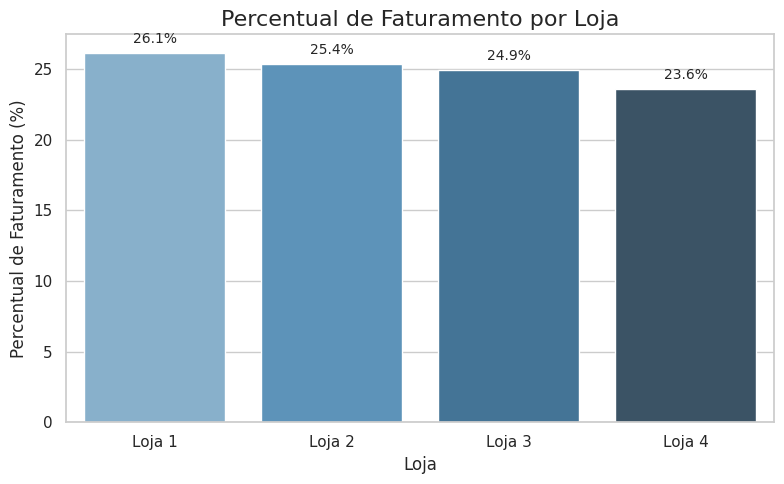

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar e padronizar os dados
dados_lojas = {}
for nome, url in urls.items():
    df = pd.read_csv(url)
    df.columns = df.columns.str.strip().str.lower().str.replace("ç", "c")
    df["faturamento"] = df["preco"]  # Cada linha representa 1 produto vendido
    dados_lojas[nome] = df

# Calcular o faturamento total de todas as lojas
faturamento_total_geral = sum([df["faturamento"].sum() for df in dados_lojas.values()])

# Calcular o percentual de faturamento por loja
percentual_faturamento = {}
for loja, df in dados_lojas.items():
    faturamento_loja = df["faturamento"].sum()
    percentual = (faturamento_loja / faturamento_total_geral) * 100
    percentual_faturamento[loja] = percentual

# Criar o gráfico de barras
sns.set(style="whitegrid")

# Preparar os dados para o gráfico
df_percentual = pd.DataFrame({
    "Loja": list(percentual_faturamento.keys()),
    "Percentual de Faturamento (%)": list(percentual_faturamento.values())
})

# Plotar o gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x="Loja", y="Percentual de Faturamento (%)", data=df_percentual, palette="Blues_d")

# Adicionar rótulos
plt.title("Percentual de Faturamento por Loja", fontsize=16)
plt.ylabel("Percentual de Faturamento (%)", fontsize=12)
plt.xlabel("Loja", fontsize=12)

# Adicionar valores no topo das barras
for i, valor in enumerate(df_percentual["Percentual de Faturamento (%)"]):
    plt.text(i, valor + 0.5, f"{valor:.1f}%", ha='center', va='bottom', fontsize=10)

# Melhorar a disposição do gráfico
plt.tight_layout()

# Mostrar o gráfico
plt.show()




plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [5]:
for loja, df in dados_lojas.items():
    print(f"\n📊 {loja} - Top 5 Categorias Mais Vendidas:")

    categorias_vendidas = (
        df["categoria do produto"]
        .value_counts()
        .head(5)
    )

    print(categorias_vendidas)



📊 Loja 1 - Top 5 Categorias Mais Vendidas:
categoria do produto
moveis              465
eletronicos         448
brinquedos          324
eletrodomesticos    312
esporte e lazer     284
Name: count, dtype: int64

📊 Loja 2 - Top 5 Categorias Mais Vendidas:
categoria do produto
moveis              442
eletronicos         422
brinquedos          313
eletrodomesticos    305
esporte e lazer     275
Name: count, dtype: int64

📊 Loja 3 - Top 5 Categorias Mais Vendidas:
categoria do produto
moveis              499
eletronicos         451
brinquedos          315
eletrodomesticos    278
esporte e lazer     277
Name: count, dtype: int64

📊 Loja 4 - Top 5 Categorias Mais Vendidas:
categoria do produto
moveis              480
eletronicos         451
brinquedos          338
esporte e lazer     277
eletrodomesticos    254
Name: count, dtype: int64


<ipython-input-6-1ffcd24b3cc8>:35: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  barplot = sns.barplot(


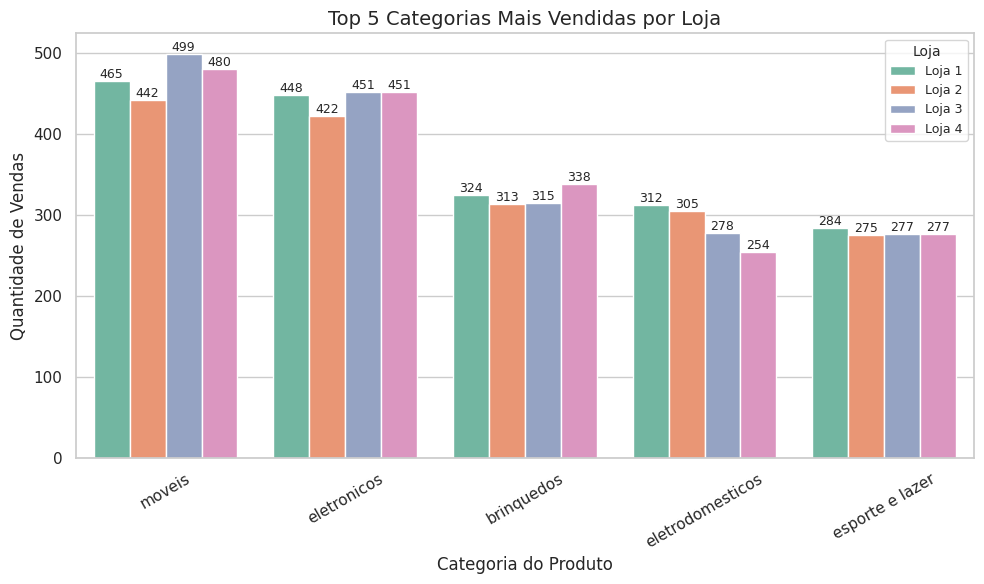

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Contar vendas por categoria em todas as lojas
from collections import Counter

contador_total = Counter()

for df in dados_lojas.values():
    contador_total.update(df["categoria do produto"].value_counts().to_dict())

# 2. Selecionar as 5 categorias mais vendidas no geral
top_categorias = [categoria for categoria, _ in contador_total.most_common(5)]

# 3. Filtrar e montar DataFrame com essas categorias
dados_categorias = []

for loja, df in dados_lojas.items():
    contagem = df["categoria do produto"].value_counts()
    for categoria in top_categorias:
        vendas = contagem.get(categoria, 0)
        dados_categorias.append({
            "Loja": loja,
            "Categoria": categoria,
            "Vendas": vendas
        })

df_categorias = pd.DataFrame(dados_categorias)

# 4. Gráfico aprimorado
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

barplot = sns.barplot(
    data=df_categorias,
    x="Categoria",
    y="Vendas",
    hue="Loja",
    palette=palette
)

# 5. Rótulos nas barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(f'{int(height)}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=9)

# Títulos e ajustes
plt.title("Top 5 Categorias Mais Vendidas por Loja", fontsize=14)
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=30)
plt.legend(title="Loja", fontsize=9, title_fontsize=10)
plt.tight_layout()
plt.show()



# 3. Média de Avaliação das Lojas

In [7]:
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

0: 'produto'
1: 'categoria do produto'
2: 'preco'
3: 'frete'
4: 'data da compra'
5: 'vendedor'
6: 'local da compra'
7: 'avaliacão da compra'
8: 'tipo de pagamento'
9: 'quantidade de parcelas'
10: 'lat'
11: 'lon'
12: 'faturamento'


In [8]:
# Remover espaços extras nas colunas de cada DataFrame
for loja, df in dados_lojas.items():
    df.columns = df.columns.str.strip()
    dados_lojas[loja] = df  # Atualiza o dicionário com os DataFrames corrigidos


In [9]:
for loja, df in dados_lojas.items():
    print(f"--- Colunas da loja: {loja} ---")
    print(df.columns)

--- Colunas da loja: Loja 1 ---
Index(['produto', 'categoria do produto', 'preco', 'frete', 'data da compra',
       'vendedor', 'local da compra', 'avaliacão da compra',
       'tipo de pagamento', 'quantidade de parcelas', 'lat', 'lon',
       'faturamento'],
      dtype='object')
--- Colunas da loja: Loja 2 ---
Index(['produto', 'categoria do produto', 'preco', 'frete', 'data da compra',
       'vendedor', 'local da compra', 'avaliacão da compra',
       'tipo de pagamento', 'quantidade de parcelas', 'lat', 'lon',
       'faturamento'],
      dtype='object')
--- Colunas da loja: Loja 3 ---
Index(['produto', 'categoria do produto', 'preco', 'frete', 'data da compra',
       'vendedor', 'local da compra', 'avaliacão da compra',
       'tipo de pagamento', 'quantidade de parcelas', 'lat', 'lon',
       'faturamento'],
      dtype='object')
--- Colunas da loja: Loja 4 ---
Index(['produto', 'categoria do produto', 'preco', 'frete', 'data da compra',
       'vendedor', 'local da compra', 

In [10]:
# Calcular a média de avaliações por loja
avaliacoes_medias = {}
for loja, df in dados_lojas.items():
    try:
        media = df["avaliacao da compra"].mean()
    except KeyError:
        try:
            media = df["avaliacão da compra"].mean()
        except KeyError:
            print(f"Aviso: Nenhuma coluna de avaliação encontrada na loja {loja}")
            continue  # Pula para a próxima loja se nenhuma coluna for encontrada
    avaliacoes_medias[loja] = media

# Mostrar os resultados
for loja, media in avaliacoes_medias.items():
    print(f"{loja}: média de avaliação = {media:.2f}")

Loja 1: média de avaliação = 3.98
Loja 2: média de avaliação = 4.04
Loja 3: média de avaliação = 4.05
Loja 4: média de avaliação = 4.00


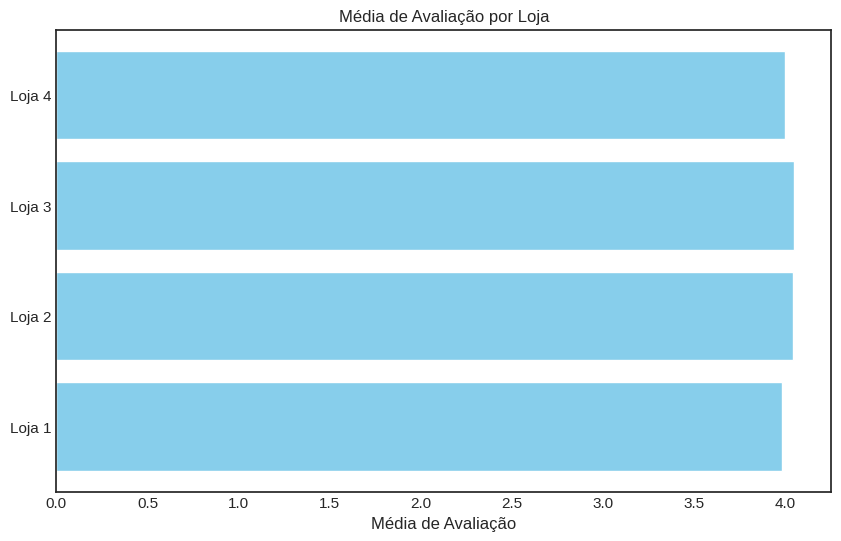

In [40]:
import matplotlib.pyplot as plt

# Dados das médias de avaliação
avaliacoes_medias = {
    "Loja 1": 3.98,
    "Loja 2": 4.04,
    "Loja 3": 4.05,
    "Loja 4": 4.00
}

# Configuração do gráfico
plt.figure(figsize=(10, 6))
plt.barh(list(avaliacoes_medias.keys()), list(avaliacoes_medias.values()), color='skyblue')
plt.xlabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')

# Exibição do gráfico
plt.show()


# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
